# Alpha Vantage Alexis Api

In [5]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf
import os
from datetime import datetime

In [7]:
API_KEY = 'TU_API_KEY_ALPHA_VANTAGE'
EMPRESA_SIMBOLO = 'IBM'

### 1. Extraer datos de una empresa. De TESLA Ej: (TESL)

In [2]:
def guardarJson_DatosPorEmpresaPorSimbolo(EMPRESA_SIMBOLO, API_KEY):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={EMPRESA_SIMBOLO}&interval=5min&apikey={API_KEY}"
    print(url)
    respuesta = requests.get(url)
    datos = respuesta.json()
    print(f"Status Code: {respuesta.status_code}")
    if respuesta.status_code == 200:
        # Guardar en archivo JSON
        fecha_hora_actual = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        nombreArchivo = f"datos_{EMPRESA_SIMBOLO}_{fecha_hora_actual}.json"
        
        with open(nombreArchivo, 'w', encoding='utf-8') as archivo:
            json.dump(datos, archivo, ensure_ascii=False, indent=4)
        print(f"Datos guardados exitosamente en: {nombreArchivo}")
        return True
    else:
        print(f"Error en {EMPRESA_SIMBOLO}: {datos.get('message', 'Desconocido')}")
        return False

In [3]:
if guardarJson_DatosPorEmpresaPorSimbolo(EMPRESA_SIMBOLO, API_KEY):
    print(f'Guardado de archivo exitoso con la empresa: {EMPRESA_SIMBOLO}')
else:
    print('El archivo no se guardó correctamente. Inténtelo de nuevo')

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=16SO2789V64VEFLJ
Status Code: 200
Datos guardados exitosamente en: datos_IBM_2025-12-29_21-38-06.json
Guardado de archivo exitoso con la empresa: IBM


### 2. Extraer datos por intradía (año/mes específico)

In [4]:
mes = '2024-12'
def obtener_datos_intradia(EMPRESA_SIMBOLO, API_KEY, mes):

    # Construir la URL base
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={EMPRESA_SIMBOLO}&interval=5min&apikey={API_KEY}"
    
    # Agregar parámetro month si se especificó
    if mes:
        url += f"&month={mes}"
        print(f"📅 Solicitando datos del mes: {mes}")
    
    print(f"🔗 URL: {url}")
    respuesta = requests.get(url)
    datos = respuesta.json()
    print(f"📊 Código de respuesta: {respuesta.status_code}")
    
    if respuesta.status_code == 200:
        # Crear nombre del archivo según si hay mes específico o no
        if mes:
            nombreJsonGuardado = f"datos_{EMPRESA_SIMBOLO}_{mes}.json"
        else:
            nombreJsonGuardado = f"datos_{EMPRESA_SIMBOLO}_recientes.json"
        
        with open(nombreJsonGuardado, 'w', encoding='utf-8') as archivo:
            json.dump(datos, archivo, ensure_ascii=False, indent=4)
        print(f"✅ Datos guardados en {nombreJsonGuardado}")
        return True
    else:
        print(f"❌ Error en {EMPRESA_SIMBOLO}: {datos.get('Error Message', 'Desconocido')}")
        return False

In [5]:
mes = '2025-09'
if obtener_datos_intradia(EMPRESA_SIMBOLO, API_KEY, mes):
    print(f'Guardado de archivo exitoso con la empresa {EMPRESA_SIMBOLO} en el mes {mes}')
else:
    print('El archivo no se guardó correctamente. Inténtelo de nuevo')

📅 Solicitando datos del mes: 2025-09
🔗 URL: https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=16SO2789V64VEFLJ&month=2025-09
📊 Código de respuesta: 200
✅ Datos guardados en datos_IBM_2025-09.json
Guardado de archivo exitoso con la empresa IBM en el mes 2025-09


### 3. Extraer datos de el json extraído por ApiRest

In [16]:
archivoJsonEstudioMercado = "datos_IBM.json"  # Modificar aquí el archivo que queramos estudiar analizar con sus gráficas y estadísticas del mercado!!
# Leemos
ibmDatos = pd.read_json(archivoJsonEstudioMercado)
#ibmDatos.head(100)

# Cargar el archivo JSON
with open(archivoJsonEstudioMercado, 'r', encoding='utf-8') as archivo:
    datos = json.load(archivo)

# Extraer la serie temporal
time_series = datos["Time Series (5min)"]

# Convertir a DataFrame - FORMA CORREGIDA
df = pd.DataFrame.from_dict(time_series, orient='index')

# Convertir índices a datetime
df.index = pd.to_datetime(df.index)

# Convertir columnas a float - FORMA CORREGIDA
for columna in df.columns:
    df[columna] = df[columna].astype(float)

# Renombrar columnas
df.columns = ['open', 'high', 'low', 'close', 'volume']

print("✅ Datos cargados correctamente")
df

✅ Datos cargados correctamente


,open,high,low,close,volume
2025-11-14 19:55:00,306.460,306.7000,306.4600,306.7000,10.0
2025-11-14 19:50:00,306.300,306.4800,306.3000,306.4600,5.0
2025-11-14 19:45:00,306.140,306.7894,305.6900,305.6900,141.0
2025-11-14 19:40:00,306.140,306.1400,306.0200,306.1300,56.0
2025-11-14 19:35:00,306.140,306.1400,306.0100,306.1400,12.0
...,...,...,...,...,...
2025-11-14 12:00:00,306.570,306.5700,306.0600,306.4000,16686.0
2025-11-14 11:55:00,306.440,306.5800,306.1200,306.4600,16595.0
2025-11-14 11:50:00,306.310,306.5900,306.1600,306.3800,25734.0
2025-11-14 11:45:00,306.233,306.4700,305.7500,306.1501,33583.0


In [7]:
print("=== INFORMACIÓN DE RESOLUCIÓN ===")
print(f"Símbolo: {datos['Meta Data']['2. Symbol']}")
print(f"Intervalo: {datos['Meta Data']['4. Interval']}")
print(f"Última actualización: {datos['Meta Data']['3. Last Refreshed']}")
print(f"Zona horaria: {datos['Meta Data']['6. Time Zone']}")
print(f"Total de registros: {len(df)}")
print(f"Período cubierto: {df.index.min()} a {df.index.max()}")
print(f"Duración total: {df.index.max() - df.index.min()}")

=== INFORMACIÓN DE RESOLUCIÓN ===
Símbolo: IBM
Intervalo: 5min
Última actualización: 2025-11-14 19:55:00
Zona horaria: US/Eastern
Total de registros: 100
Período cubierto: 2025-11-14 11:40:00 a 2025-11-14 19:55:00
Duración total: 0 days 08:15:00


### 4. Gráficos

#### 1. Graficos de Precios OHCL (Open, High, Low, Close)

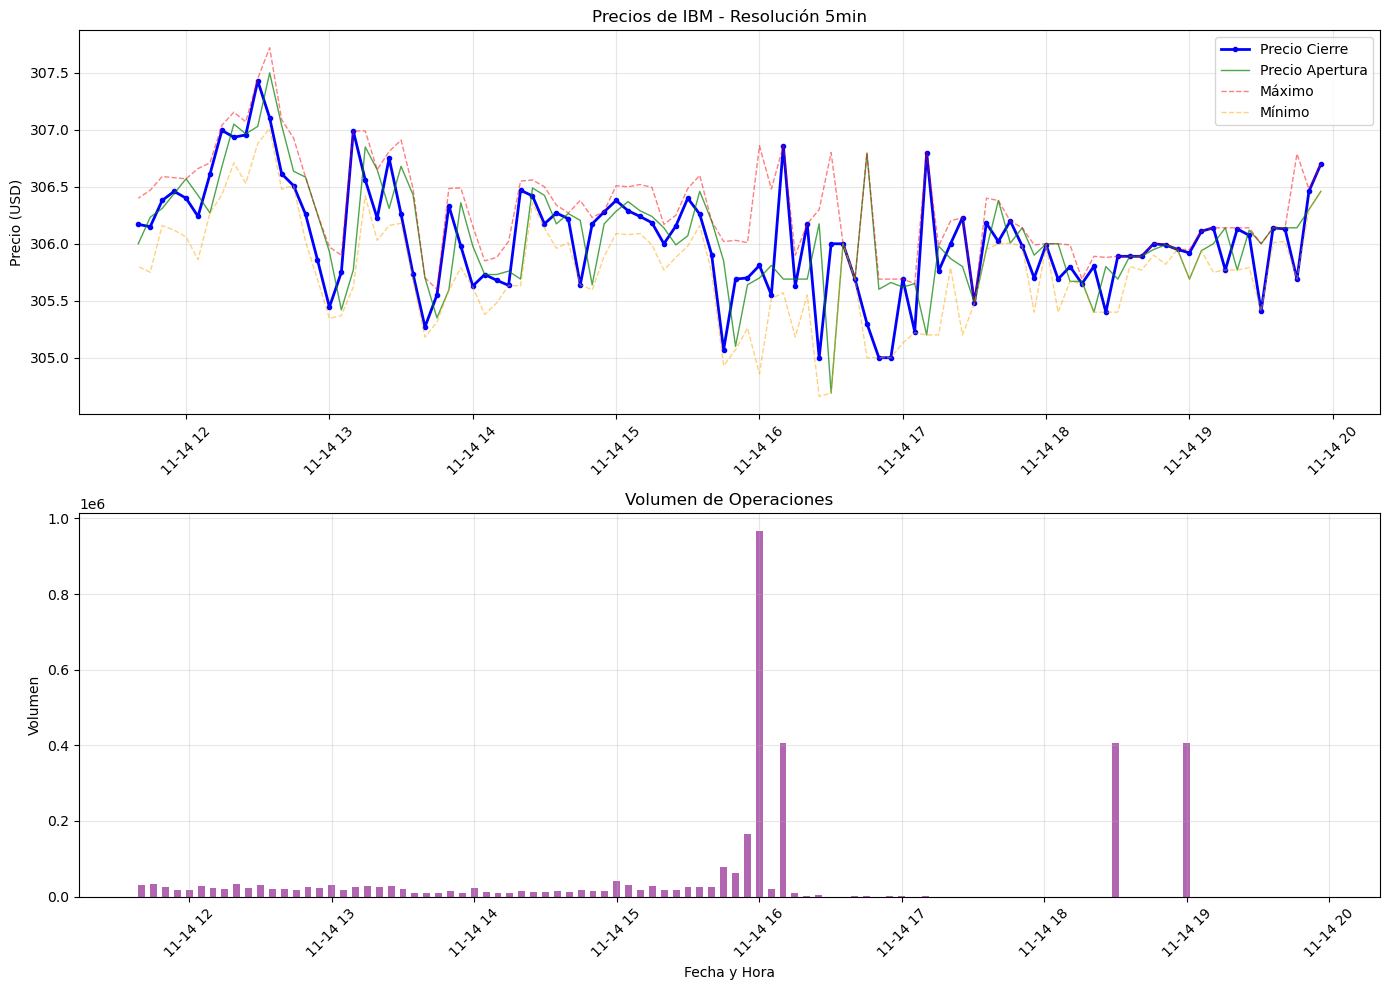

In [8]:
plt.figure(figsize=(14, 10))

# Gráfico principal de precios
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], label='Precio Cierre', linewidth=2, color='blue', marker='o', markersize=3)
plt.plot(df.index, df['open'], label='Precio Apertura', linewidth=1, color='green', alpha=0.7)
plt.plot(df.index, df['high'], label='Máximo', linewidth=1, color='red', alpha=0.5, linestyle='--')
plt.plot(df.index, df['low'], label='Mínimo', linewidth=1, color='orange', alpha=0.5, linestyle='--')

plt.title(f'Precios de {EMPRESA_SIMBOLO} - Resolución {datos["Meta Data"]["4. Interval"]}')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Gráfico de volumen
plt.subplot(2, 1, 2)
plt.bar(df.index, df['volume'], color='purple', alpha=0.6, width=0.002)
plt.title('Volumen de Operaciones')
plt.ylabel('Volumen')
plt.xlabel('Fecha y Hora')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 2. Gráfico de Velas (Candlestick) 

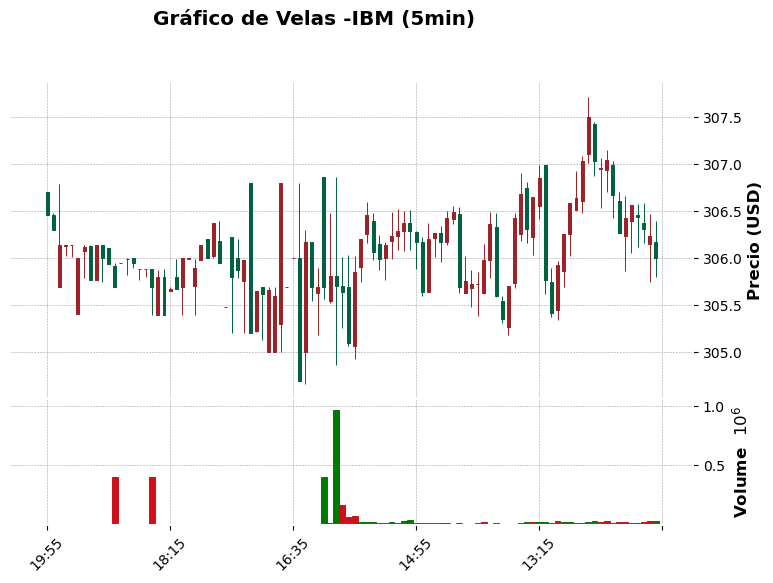

In [9]:
df_candle = df[['open', 'high', 'low', 'close', 'volume']].copy()
df_candle.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Crear gráfico de velas
mpf.plot(df_candle, 
         type='candle',
         style='charles',
         title=f'Gráfico de Velas -{EMPRESA_SIMBOLO} ({datos["Meta Data"]["4. Interval"]})',
         ylabel='Precio (USD)',
         volume=True,
         figratio=(12, 8),
         figscale=1.1,
         datetime_format='%H:%M',
         xrotation=45)

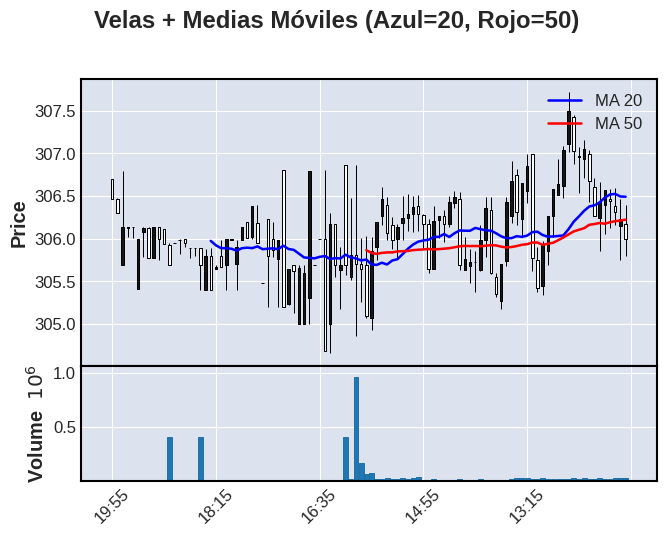

In [10]:
# Calcular dos medias móviles
df_candle['SMA_20'] = df_candle['Close'].rolling(window=20).mean()
df_candle['SMA_50'] = df_candle['Close'].rolling(window=50).mean()

# Crear plots
sma_20_plot = mpf.make_addplot(df_candle['SMA_20'], color='blue', label='MA 20')
sma_50_plot = mpf.make_addplot(df_candle['SMA_50'], color='red', label='MA 50')

# Gráfico final
mpf.plot(df_candle,
         type='candle',
         addplot=[sma_20_plot, sma_50_plot],
         title='Velas + Medias Móviles (Azul=20, Rojo=50)',
         volume=True)

#### ✅TENDENCIA ALCISTA
- **Velas SOBRE la línea azul** 
- Mercado en MODO OPTIMISTA
- Los compradores dominan
- Señal de COMPRA potencial

#### ❌TENDENCIA BAJISTA  
- **Velas BAJO la línea azul**
- Mercado en MODO PESIMISTA
- Los vendedores dominan
- Señal de VENTA potencial

#### 3. Gráfico análisis de Variaciones y Rangos

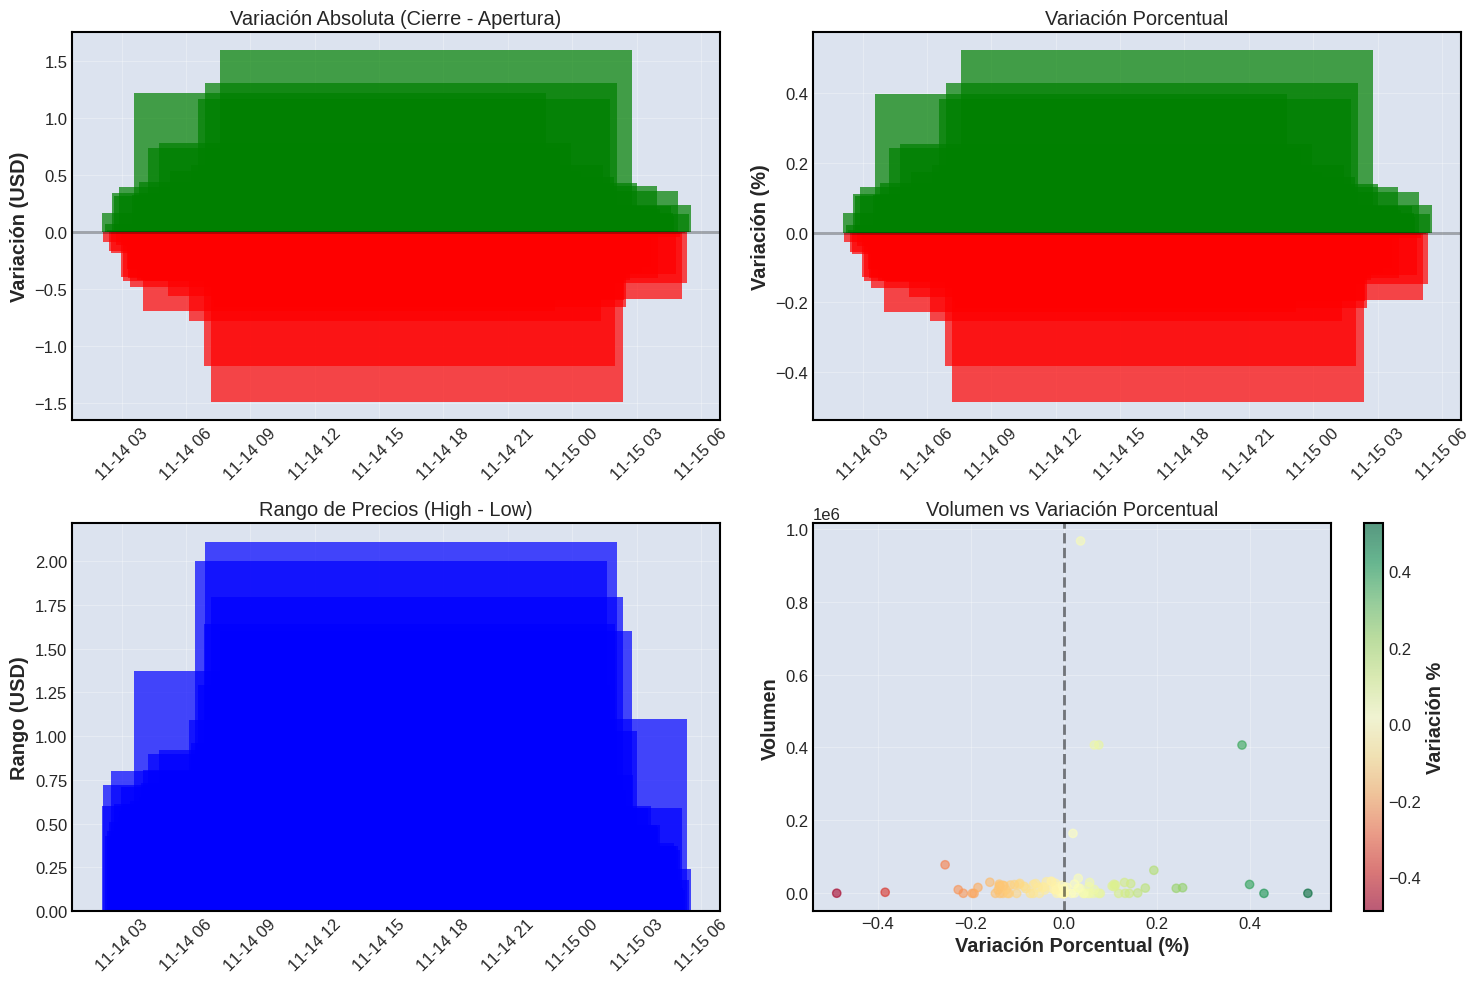

In [11]:
# Calcular variaciones
df['variacion'] = df['close'] - df['open']
df['rango_dia'] = df['high'] - df['low']
df['variacion_porcentual'] = (df['variacion'] / df['open']) * 100

plt.figure(figsize=(15, 10))

# Subplot 1: Variación absoluta
plt.subplot(2, 2, 1)
colors = ['green' if x >= 0 else 'red' for x in df['variacion']]
plt.bar(df.index, df['variacion'], color=colors, alpha=0.7)
plt.title('Variación Absoluta (Cierre - Apertura)')
plt.ylabel('Variación (USD)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 2: Variación porcentual
plt.subplot(2, 2, 2)
colors_pct = ['green' if x >= 0 else 'red' for x in df['variacion_porcentual']]
plt.bar(df.index, df['variacion_porcentual'], color=colors_pct, alpha=0.7)
plt.title('Variación Porcentual')
plt.ylabel('Variación (%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 3: Rango de precios
plt.subplot(2, 2, 3)
plt.bar(df.index, df['rango_dia'], color='blue', alpha=0.7)
plt.title('Rango de Precios (High - Low)')
plt.ylabel('Rango (USD)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 4: Volumen vs Variación
plt.subplot(2, 2, 4)
plt.scatter(df['variacion_porcentual'], df['volume'], 
           c=df['variacion_porcentual'], cmap='RdYlGn', alpha=0.6)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.title('Volumen vs Variación Porcentual')
plt.xlabel('Variación Porcentual (%)')
plt.ylabel('Volumen')
plt.colorbar(label='Variación %')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 4. Estadísticas Resumen

In [12]:
print("=== ESTADÍSTICAS DETALLADAS ===")
print(f"Precio de cierre promedio: ${df['close'].mean():.2f}")
print(f"Precio más alto del período: ${df['high'].max():.2f}")
print(f"Precio más bajo del período: ${df['low'].min():.2f}")
print(f"Volumen total: {df['volume'].sum():,} acciones")
print(f"Volumen promedio por intervalo: {df['volume'].mean():.0f} acciones")
print(f"Mayor variación positiva: +${df['variacion'].max():.2f} ({df['variacion_porcentual'].max():.2f}%)")
print(f"Mayor variación negativa: -${abs(df['variacion'].min()):.2f} ({df['variacion_porcentual'].min():.2f}%)")
print(f"Rango promedio: ${df['rango_dia'].mean():.2f}")

# Distribución de variaciones
print(f"\nDistribución de variaciones:")
print(f"Positivas: {len(df[df['variacion'] > 0])} intervalos")
print(f"Negativas: {len(df[df['variacion'] < 0])} intervalos")
print(f"Neutras: {len(df[df['variacion'] == 0])} intervalos")

=== ESTADÍSTICAS DETALLADAS ===
Precio de cierre promedio: $306.04
Precio más alto del período: $307.72
Precio más bajo del período: $304.66
Volumen total: 3,543,398.0 acciones
Volumen promedio por intervalo: 35434 acciones
Mayor variación positiva: +$1.60 (0.52%)
Mayor variación negativa: -$1.50 (-0.49%)
Rango promedio: $0.56

Distribución de variaciones:
Positivas: 40 intervalos
Negativas: 51 intervalos
Neutras: 9 intervalos


#### 5. Gráfico de Distribución

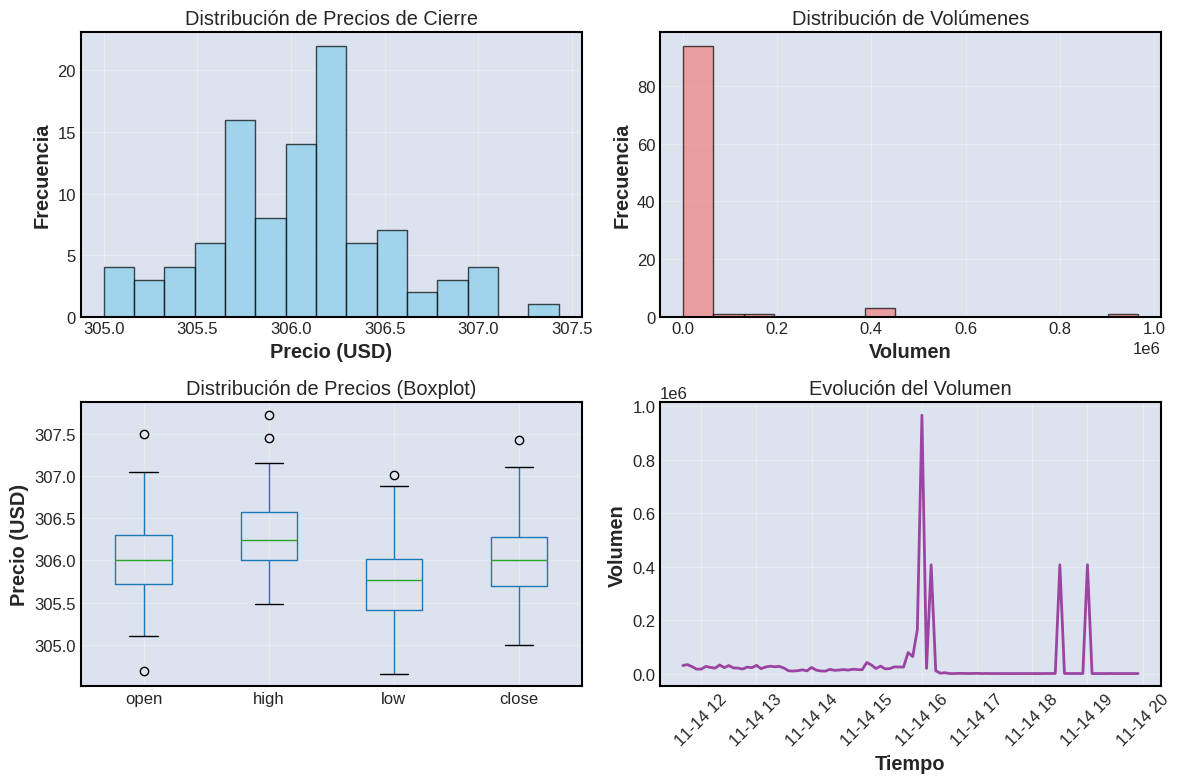

In [13]:
plt.figure(figsize=(12, 8))

# Distribución de precios de cierre
plt.subplot(2, 2, 1)
plt.hist(df['close'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios de Cierre')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# Distribución de volúmenes
plt.subplot(2, 2, 2)
plt.hist(df['volume'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Volúmenes')
plt.xlabel('Volumen')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# Boxplot de precios
plt.subplot(2, 2, 3)
df[['open', 'high', 'low', 'close']].boxplot()
plt.title('Distribución de Precios (Boxplot)')
plt.ylabel('Precio (USD)')
plt.grid(True, alpha=0.3)

# Tendencia temporal del volumen
plt.subplot(2, 2, 4)
plt.plot(df.index, df['volume'], color='purple', alpha=0.7)
plt.title('Evolución del Volumen')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5. Exportar el analisis a CSV.

In [14]:
# Guardar DataFrame con análisis
df_analisis = df.copy()
fecha_hora_actual = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
analisisArchivoActual = f"analisis_{fecha_hora_actual}.csv"
df_analisis.to_csv(analisisArchivoActual, encoding='utf-8')
print("✅ Análisis exportado a 'analisis_ibm.csv'")

# Resumen estadístico
resumen = df.describe()
print("\n📊 Resumen estadístico completo:")
print(resumen)

✅ Análisis exportado a 'analisis_ibm.csv'

📊 Resumen estadístico completo:
             open        high         low       close         volume  \
count  100.000000  100.000000  100.000000  100.000000     100.000000   
mean   306.058469  306.313916  305.753769  306.044222   35433.980000   
std      0.447867    0.428383    0.454881    0.474550  117431.233185   
min    304.690000  305.480000  304.660000  305.000000       2.000000   
25%    305.722975  306.000000  305.407500  305.700000     135.500000   
50%    306.000000  306.240100  305.770000  306.010000   12501.500000   
75%    306.302500  306.572500  306.012500  306.272500   23321.750000   
max    307.500000  307.720000  307.012300  307.430000  966013.000000   

        variacion   rango_dia  variacion_porcentual  
count  100.000000  100.000000            100.000000  
mean    -0.014247    0.560147             -0.004560  
std      0.452245    0.401672              0.147869  
min     -1.496600    0.000000             -0.487815  
25%   